#Linear Regrassion Project.
This data analysis worksheet is to practise working with linear regression.
###Kaggle link to the dataset:
Car Price Prediction Multiple Linear Regression *(Predicting the Prices of cars using RFE and VIF)*
https://www.kaggle.com/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv 


##Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

##Load and Check Data

In [4]:
#To upload the file directly to the google colab worksheet
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [5]:
# To rename the uplaoded file name
cp_asin = pd.read_csv("CarPrice_Assignment.csv", encoding = "unicode_escape")

In [6]:
# To check and ensure that the data set has been imported and read correctly
cp_asin.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# To get info on the data that is stored in the dataset
cp_asin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##EDA (Exploaratary data analysis)
###This will check for:
*   X and Y relationships
*   Amounts
*   Distributions
*   Proportions
*   Correlations
*   Uncertainty

In [ ]:
# This is to get the different values. Like min, max, etc.
cp_asin.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.00,59.32,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.83,1.25,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.76,6.02,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.05,12.34,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.91,2.15,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.72,2.44,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.91,41.64,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.33,0.27,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.26,0.31,2.07,3.11,3.29,3.41,4.17


In [ ]:
# Find missing values, features and unique values
print("n\Features: \n", cp_asin.columns.tolist())
print("\nMissing values: ", cp_asin.isnull().sum().values.sum())
print("\nUnique Values: \n", cp_asin.nunique())

n\Features: 
 ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Missing values:  0

Unique Values: 
 car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
pri

In [ ]:
# Correlation table
cp_asin.corr().round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.00,-0.15,0.13,0.17,0.05,0.26,0.07,-0.03,0.26,-0.16,0.15,-0.02,-0.20,0.02,0.01,-0.11
symboling,-0.15,1.00,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.01,-0.18,0.07,0.27,-0.04,0.03,-0.08
wheelbase,0.13,-0.53,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,0.17,-0.36,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.68
carwidth,0.05,-0.23,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,0.26,-0.54,0.59,0.49,0.28,1.00,0.30,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curbweight,0.07,-0.23,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.84
enginesize,-0.03,-0.11,0.57,0.68,0.74,0.07,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,0.87
boreratio,0.26,-0.13,0.49,0.61,0.56,0.17,0.65,0.58,1.00,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55
stroke,-0.16,-0.01,0.16,0.13,0.18,-0.06,0.17,0.20,-0.06,1.00,0.19,0.08,-0.07,-0.04,-0.04,0.08


No handles with labels found to put in legend.


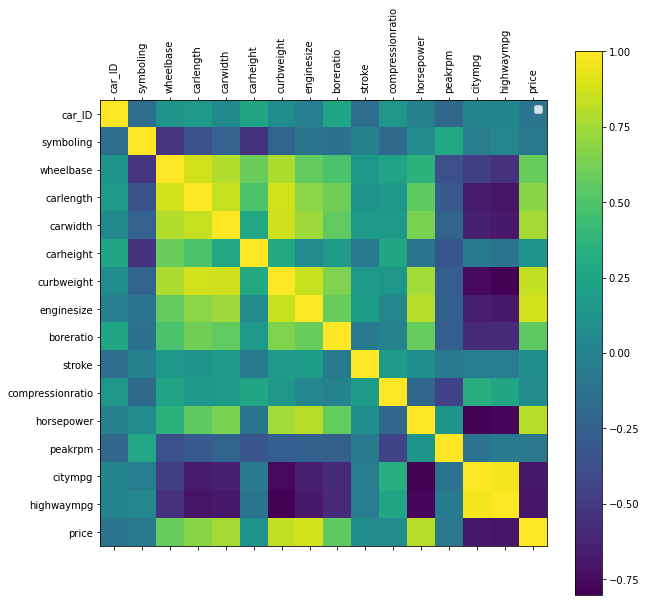

In [ ]:
def plot_corr(cp_asin,size=10):
  corr = cp_asin.corr()
  fig,ax = plt.subplots(figsize = (size,size))
  ax.legend()
  cax = ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation = "vertical")
  plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(cp_asin)

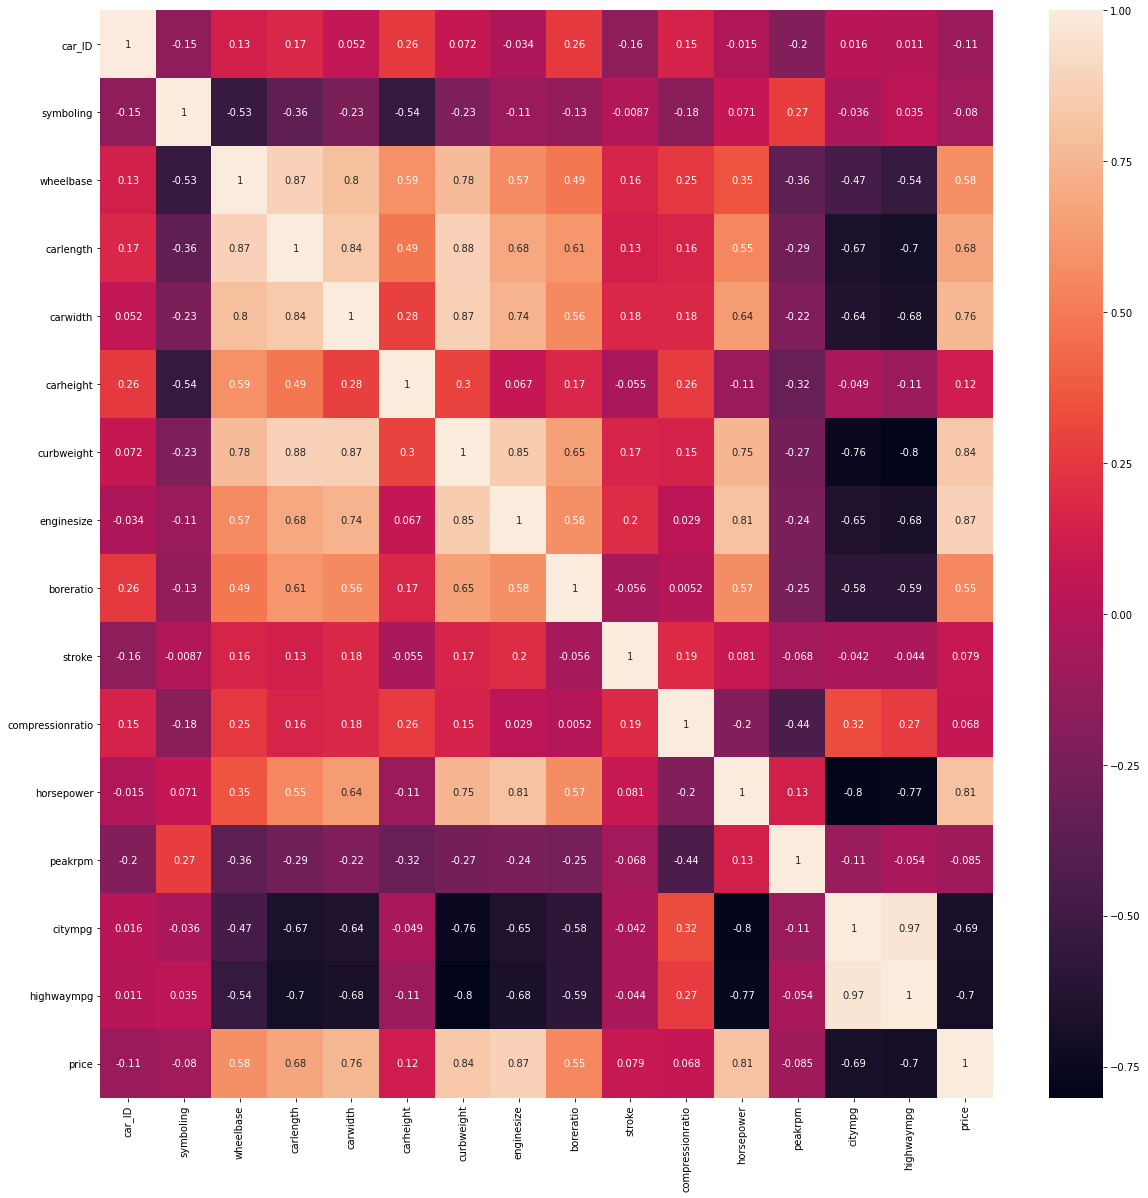

In [ ]:
# Created a heatmap here
plt.figure(figsize=(20, 20))
sns.heatmap(cp_asin.corr(), annot=True)

###Histograms: Distributions

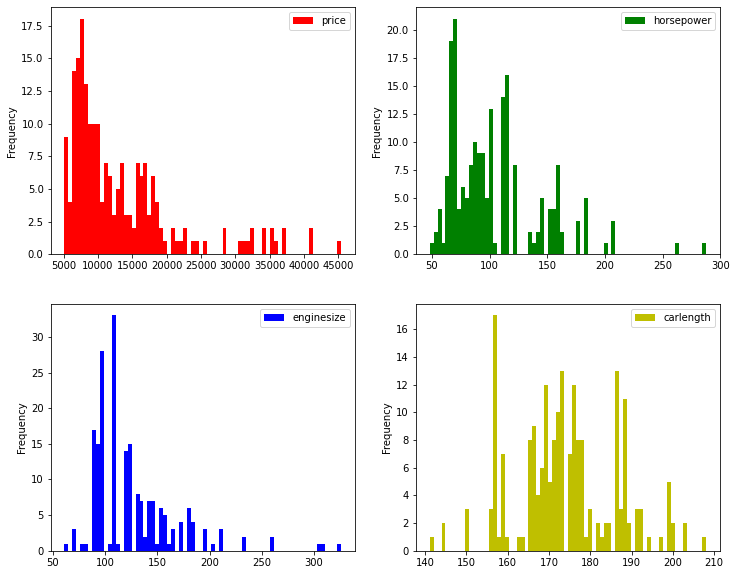

In [ ]:
# Creating histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
cp_asin.plot(kind="hist", y = "price", bins = 70, color = "r", ax = axes[0,0])
cp_asin.plot(kind="hist", y = "horsepower", bins = 70, color = "g", ax = axes[0,1])
cp_asin.plot(kind="hist", y = "enginesize", bins = 70, color = "b", ax = axes[1,0])
cp_asin.plot(kind="hist", y = "carlength", bins = 70, color = "y", ax = axes[1,1])


###Bar Graphs: Comparisons

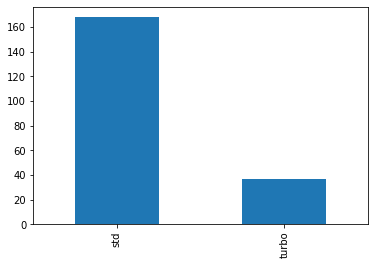

In [ ]:
# Comparing the amount of vehilce that are tubo vesus standard
cp_asin["aspiration"].value_counts().plot(kind = "bar")

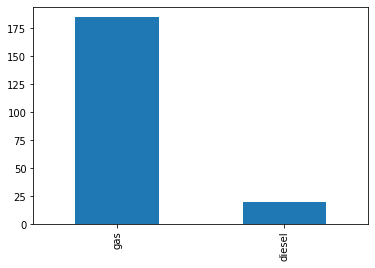

In [ ]:
# Comparing the fuel types, gas to diesel
cp_asin["fueltype"].value_counts().plot(kind = "bar")

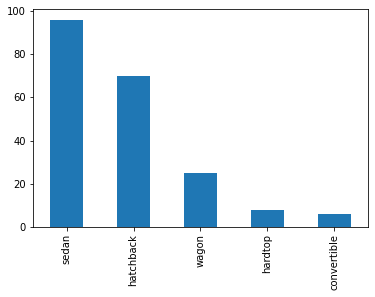

In [ ]:
# Comparing the car bodies
cp_asin["carbody"].value_counts().plot(kind = "bar")

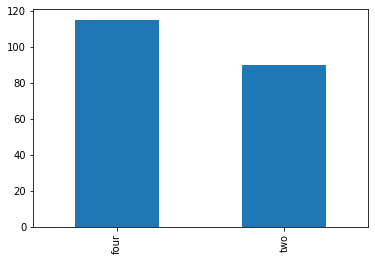

In [ ]:
# Comparing the number of doors on the cars
cp_asin["doornumber"].value_counts().plot(kind = "bar")

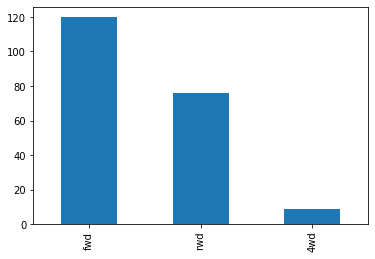

In [ ]:
# Comparing the drive train for the cars
cp_asin["drivewheel"].value_counts().plot(kind = "bar")

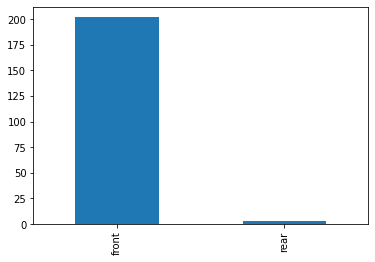

In [ ]:
# Comparing the engine location
cp_asin["enginelocation"].value_counts().plot(kind = "bar")

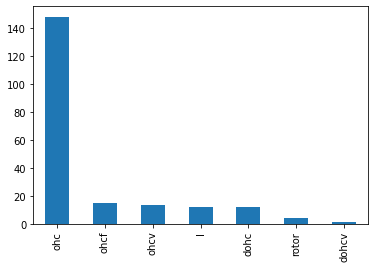

In [ ]:
# Comparing the engine types of the cars
cp_asin["enginetype"].value_counts().plot(kind = "bar")

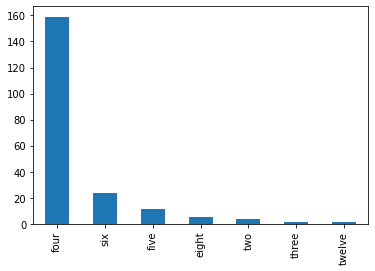

In [ ]:
# Comparing the number of cylinders in the cars
cp_asin["cylindernumber"].value_counts().plot(kind = "bar") 

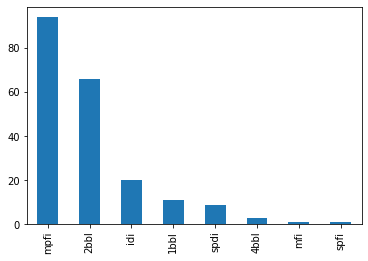

In [ ]:
# Comparing the different fuel systems in the cars
cp_asin["fuelsystem"].value_counts().plot(kind = "bar")

###Scatterplot: X and Y relationship

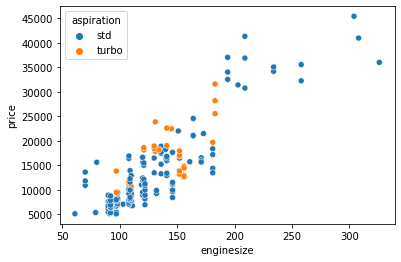

In [ ]:
# Show the relationship between the engine size and the price, and also see if it changes from a standard engine to a turbo powered one
sns.scatterplot(data = cp_asin, x = "enginesize", y = "price", hue = "aspiration");

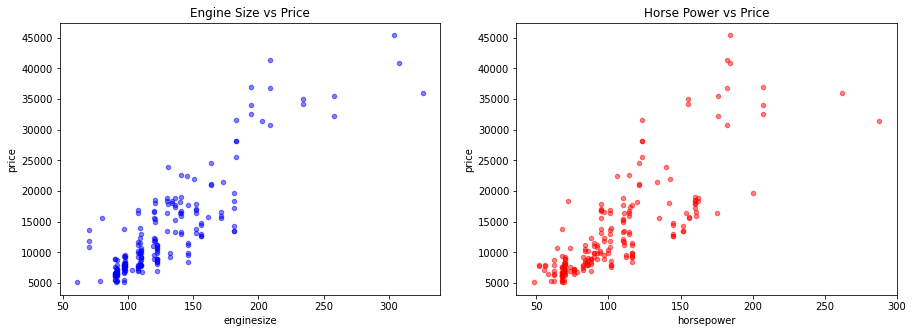

In [ ]:
# This shows how and if the engine size and the horse power affects the car prices, in separate graphs 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
cp_asin.plot(kind="scatter", x="enginesize", y="price", alpha=0.5, color="blue", ax = axes[0], title= "Engine Size vs Price")
cp_asin.plot(kind="scatter", x="horsepower", y="price", alpha=0.5, color="red", ax = axes[1], title= "Horse Power vs Price")


###Displot

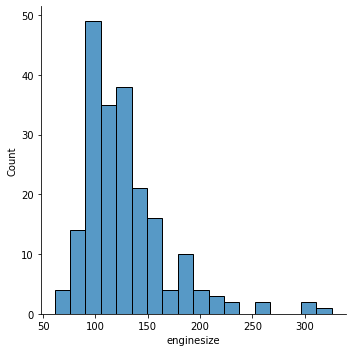

In [ ]:
# This shows the distrubrution of the amount of cars that have a certain engine size
sns.displot(cp_asin["enginesize"])

###Violin graph

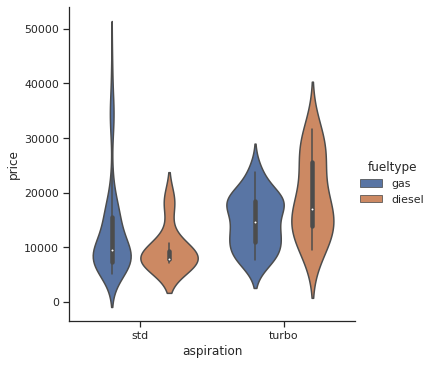

In [ ]:
# This shows how the car price is affected by the fuel type and number of those cars that are standard versus turbo 
sns.catplot(x = "aspiration", y = "price", hue = "fueltype",
            kind = "violin", data = cp_asin)

###Ticks graph?

In [ ]:
# I STILL HAVE NO IDEA!!!!!!!!!! AND THIS ONE IS EVEN MORE CONFUSING THAN THE LAST "TICKS" GRAPH (an mi til nuh knoe ef a di rite naim dat........)
sns.set(style = "ticks")
sns.pairplot(cp_asin, hue = "fueltype")
plt.title("Fuel Type")

Output hidden; open in https://colab.research.google.com to view.

#Feature engineering

##Detecting Missing Data

In [ ]:
# Literally just replacing the empty spaces with the word "NaN"
cp_asin = cp_asin.replace(" ", np.nan)
cp_asin.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##Detecting and Treating Missing values

In [ ]:
# This is supposed to how many missing values there are but thank god there are none. (Miss, I just picked a random one btw this is 100% not on purpose)
print(cp_asin.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


##Detecing and treating duplicates

In [ ]:
#Find the size of the datasheet
cp_asin.shape

(205, 26)

In [ ]:
# Find the number of duplicated rows
dup_r_cp_asin = cp_asin[cp_asin.duplicated()]
print("The number of rows duplicated are: ", dup_r_cp_asin.shape)

The number of rows duplicated are:  (0, 26)


In [ ]:
# Show the number of values present before dropping the dupes
cp_asin.count()

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

In [ ]:
# Here I Drop the dupe rows
cp_asin = cp_asin.drop_duplicates()
cp_asin.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Show the number of values present in the datasheet after droping the dupe rows
cp_asin.count()

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

##Detecting and treating Categorical Variables

In [12]:
car_price = cp_asin["price"]
bins = [5100, 15325, 25550, 35775, 46000]
cats = pd.cut(car_price, bins)
cats

0       (5100, 15325]
1      (15325, 25550]
2      (15325, 25550]
3       (5100, 15325]
4      (15325, 25550]
            ...      
200    (15325, 25550]
201    (15325, 25550]
202    (15325, 25550]
203    (15325, 25550]
204    (15325, 25550]
Name: price, Length: 205, dtype: category
Categories (4, interval[int64]): [(5100, 15325] < (15325, 25550] < (25550, 35775] < (35775, 46000]]

In [13]:
cats.value_counts()

(5100, 15325]     143
(15325, 25550]     44
(25550, 35775]     12
(35775, 46000]      6
Name: price, dtype: int64

In [18]:
group_name = ["Cheapest", "Cheap", "Expensive","Most Expensive"]

In [19]:
cats2 = pd.cut(car_price, bins, labels= group_name)  

In [20]:
cats2.value_counts()

Cheapest          143
Cheap              44
Expensive          12
Most Expensive      6
Name: price, dtype: int64

##Detect and Treat Skewed Distributions

In [21]:
cp_asin.skew( )

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

##Linear Regression

In [52]:
x = np.array(cp_asin["price"]).reshape((-1, 1))
y = np.array(cp_asin["horsepower"])

In [53]:
print(x)
print(y)

[[13495.   ]
 [16500.   ]
 [16500.   ]
 [13950.   ]
 [17450.   ]
 [15250.   ]
 [17710.   ]
 [18920.   ]
 [23875.   ]
 [17859.167]
 [16430.   ]
 [16925.   ]
 [20970.   ]
 [21105.   ]
 [24565.   ]
 [30760.   ]
 [41315.   ]
 [36880.   ]
 [ 5151.   ]
 [ 6295.   ]
 [ 6575.   ]
 [ 5572.   ]
 [ 6377.   ]
 [ 7957.   ]
 [ 6229.   ]
 [ 6692.   ]
 [ 7609.   ]
 [ 8558.   ]
 [ 8921.   ]
 [12964.   ]
 [ 6479.   ]
 [ 6855.   ]
 [ 5399.   ]
 [ 6529.   ]
 [ 7129.   ]
 [ 7295.   ]
 [ 7295.   ]
 [ 7895.   ]
 [ 9095.   ]
 [ 8845.   ]
 [10295.   ]
 [12945.   ]
 [10345.   ]
 [ 6785.   ]
 [ 8916.5  ]
 [ 8916.5  ]
 [11048.   ]
 [32250.   ]
 [35550.   ]
 [36000.   ]
 [ 5195.   ]
 [ 6095.   ]
 [ 6795.   ]
 [ 6695.   ]
 [ 7395.   ]
 [10945.   ]
 [11845.   ]
 [13645.   ]
 [15645.   ]
 [ 8845.   ]
 [ 8495.   ]
 [10595.   ]
 [10245.   ]
 [10795.   ]
 [11245.   ]
 [18280.   ]
 [18344.   ]
 [25552.   ]
 [28248.   ]
 [28176.   ]
 [31600.   ]
 [34184.   ]
 [35056.   ]
 [40960.   ]
 [45400.   ]
 [16503.   ]
 [ 5389.   ]

In [57]:
model = LinearRegression().fit(x, y)

In [58]:
r_sq = model.score(x, y)
print("coefficient of determination: ", r_sq)

coefficient of determination:  0.653088356490231


In [59]:
print("intercept: ", model.intercept_)

intercept:  51.00729417517778


In [60]:
print("Slope: ", model.coef_)

Slope:  [0.00400022]


In [63]:
y_pred = model.predict(x)
print("The predicted response: ", y_pred, sep ="\n")

The predicted response: 
[104.99027917 117.01094386 117.01094386 106.81037981 120.81115399
 112.01066737 121.8512115  126.69147914 146.51257515 122.44791249
 116.73092837 118.71103786 134.89193259 135.43196245 149.27272778
 174.05409807 216.27643276 198.53545177  71.61243354  76.18868658
  77.30874852  73.29652666  76.51670472  82.83705421  75.92467199
  77.7767744   81.44497723  85.24118714  86.69326744 102.86616172
  76.92472728  78.42881045  72.6044884   77.12473834  79.52487106
  80.18890778  80.18890778  82.58904049  87.38930592  86.38925063
  92.18957135 102.79015752  92.38958241  78.14879497  86.67526644
  86.67526644  95.20173791 180.01442764 193.21515758 195.01525712
  71.78844327  75.38864235  78.18879718  77.78877506  80.5889299
  94.78971513  98.3899142  105.59031235 113.59075474  86.38925063
  84.98917321  93.38963771  91.9895603   94.18968195  95.98978149
 124.13133758 124.38735174 153.22094609 164.00554243 163.7175265
 177.41428387 187.75085543 191.23904831 214.85635423 

In [64]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [65]:
y_new = model.predict(x_new)
print(y_new)

[51.00729418 51.0112944  51.01529462 51.01929484 51.02329506]
